Welcome to my notebook! This is a copy/paste welcome message for all my notebooks :) 📓 This repository/notebook serves as a personal reminder for me, documenting code snippets and techniques sourced from various learning resources. The goal is to consolidate valuable information and create a basic reference guide. Please note that the codes included here are not originally mine, and credit goes to the respective authors and resources. Feel free to explore and use this collection as a shared learning space. Happy coding

#### Sources for this notebook : 
    * https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation#controlnet 
    
#### Purpose :
    * Understanding text-to-image concept
    * Using different models and parameters at text-to-image pipeline
    
#### Keywords :
    * Stable diffusion
    * Stable diffusion XL
    * ControlNet
    * Kandinsky
    * Schedulers

''...
Text-to-image generates an image from a text description which is also known as a prompt.

From a very high level, a diffusion model takes a prompt and some random initial noise, and iteratively removes the noise to construct an image. The denoising process is guided by the prompt, and once the denoising process ends after a predetermined number of time steps, the image representation is decoded into an image...
''

Let's load a checkpoint into Autopipelinefortext2image class, and it will automaticly find the proper pipeline for our checkpoint...

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")

C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]
diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?,

In [2]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 50/50 [00:08<00:00,  5.59it/s]


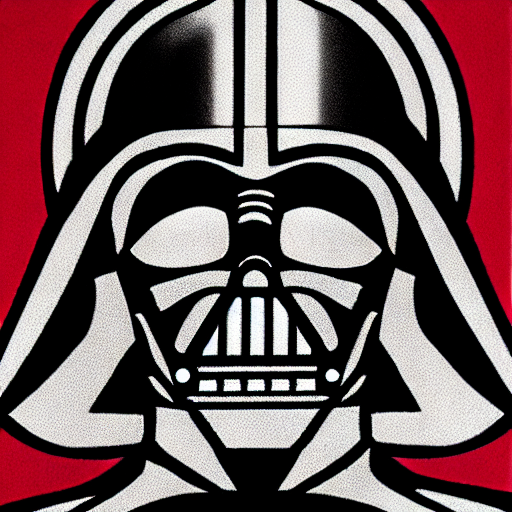

In [3]:
image = pipeline(
	"stained glass of darth vader, backlight, centered composition, masterpiece, photorealistic, 8k"
).images[0]
image

''... 
The most common text-to-image models are Stable Diffusion v1.5, Stable Diffusion XL (SDXL), and Kandinsky 2.2. There are also ControlNet models or adapters that can be used with text-to-image models for more direct control in generating images.
...''

Let's see these popular models results

NOTE : downloading new models take time. SD v1.5 and SDXL model is ready in my local, but not with var16... so there will be a different from source page

#### Stable Diffusion v1.5

100%|██████████| 50/50 [00:08<00:00,  5.90it/s]


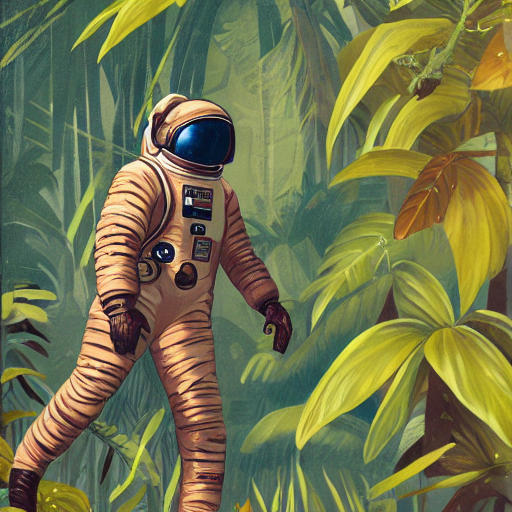

In [4]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

#### SDXL

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16).to("cuda")
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (T

#### Kandinsky 2.2

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16
).to("cuda")


C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]
README.md: 100%|██████████| 7.34k/7.34k [00:00<00:00, 904kB/s]


movq/config.json: 100%|██████████| 660/660 [00:00<00:00, 73.3kB/s]

scheduler/sched

In [2]:
pipeline

KandinskyV22CombinedPipeline {
  "_class_name": "KandinskyV22CombinedPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "kandinsky-community/kandinsky-2-2-decoder",
  "movq": [
    "diffusers",
    "VQModel"
  ],
  "prior_image_encoder": [
    "transformers",
    "CLIPVisionModelWithProjection"
  ],
  "prior_image_processor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "prior_prior": [
    "diffusers",
    "PriorTransformer"
  ],
  "prior_scheduler": [
    "diffusers",
    "UnCLIPScheduler"
  ],
  "prior_text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "prior_tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ]
}

  0%|          | 0/25 [00:00<?, ?it/s]C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 25/25 [00:22<00:00,  1.12it/s]
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\pipelines\kandinsky2_2\pipeline_kandinsky2_2.py:202: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(
100%|██████████| 100/100 [12:39<00:00,  7.60s/it]


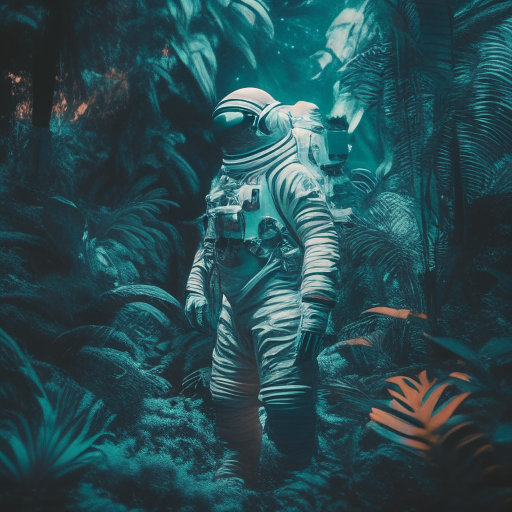

In [3]:
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", generator=generator).images[0]
image

#### ControlNet

''...ControlNet models are auxiliary models or adapters that are finetuned on top of text-to-image models.

With ControlNet, you add an additional conditioning input image to the model. For example, if you provide an image of a human pose (usually represented as multiple keypoints that are connected into a skeleton) as a conditioning input, the model generates an image that follows the pose of the image....''


In [1]:
from diffusers import ControlNetModel, AutoPipelineForText2Image
from diffusers.utils import load_image
import torch

controlnet = ControlNetModel.from_pretrained(
	"lllyasviel/control_v11p_sd15_openpose", torch_dtype=torch.float16).to("cuda")
pose_image = load_image("https://huggingface.co/lllyasviel/control_v11p_sd15_openpose/resolve/main/images/control.png")

C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
controlnet

ControlNetModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (controlnet_cond_embedding): ControlNetConditioningEmbedding(
    (conv_in): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (blocks): ModuleList(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): Conv2d(32, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (4): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): Conv2d(96, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (conv_out): Conv2d(256, 320, ker

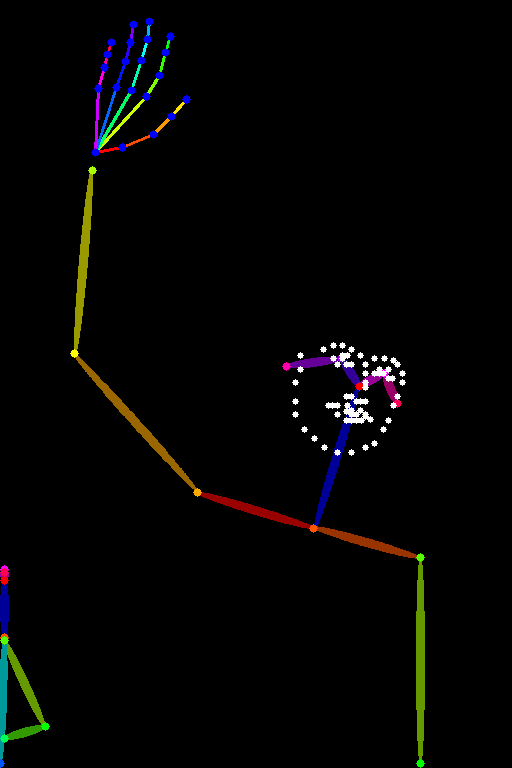

In [3]:
pose_image

In [4]:
pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16).to("cuda")


Loading pipeline components...: 100%|██████████| 7/7 [00:09<00:00,  1.32s/it]


In [5]:
pipeline

StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 50/50 [00:17<00:00,  2.83it/s]


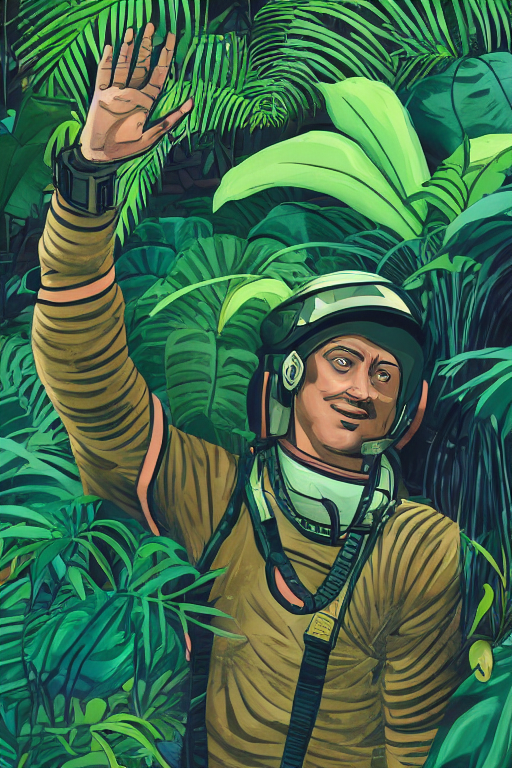

In [6]:
generator = torch.Generator("cuda").manual_seed(31)
image = pipeline("Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", image=pose_image, generator=generator).images[0]
image

### Configure pipeline parameters

#### Height and width

100%|██████████| 50/50 [00:12<00:00,  4.10it/s]


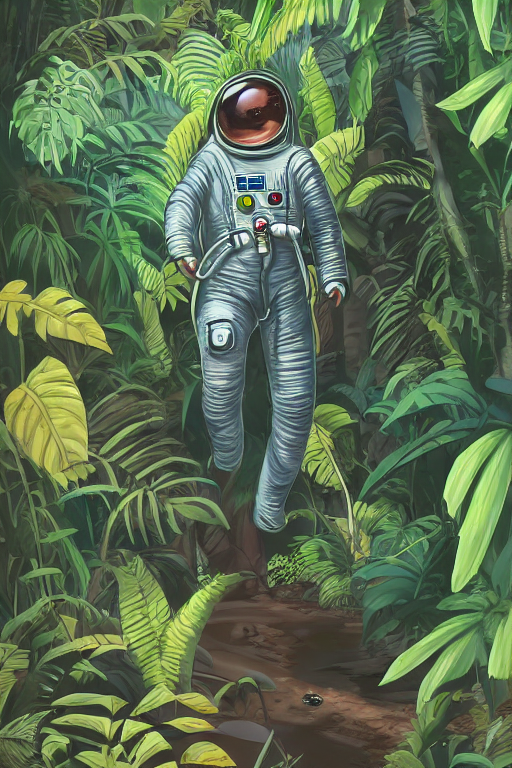

In [7]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
image = pipeline(
	"Astronaut in a jungle, cold color palette, muted colors, detailed, 8k", height=768, width=512
).images[0]
image

NOTE : Other models may have different default image sizes depending on the image sizes in the training dataset. For example, SDXL’s default image size is 1024x1024 and using lower height and width values may result in lower quality images

#### Guidance scale

The guidance_scale parameter affects how much the prompt influences image generation.

#### Negative prompt

Just like how a prompt guides generation, a negative prompt steers the model away from things you don’t want the model to generate.

100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


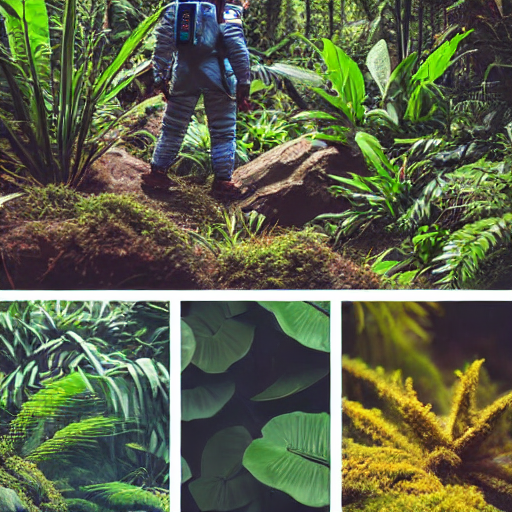

In [8]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")
image = pipeline(
	prompt="Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
	negative_prompt="ugly, deformed, disfigured, poor details, bad anatomy",
).images[0]
image

100%|██████████| 50/50 [02:36<00:00,  3.14s/it]


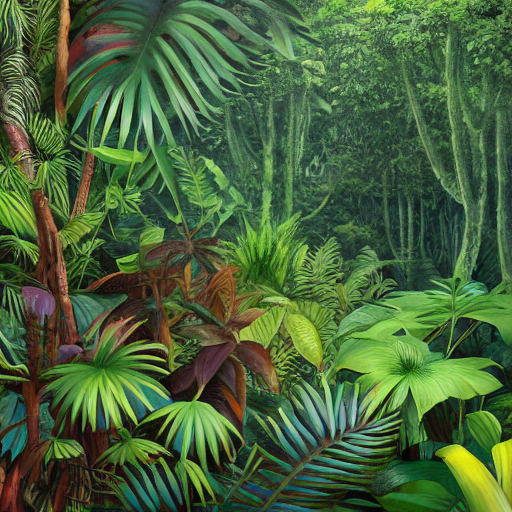

In [9]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")
image = pipeline(
	prompt="Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
	negative_prompt="astronaut",
).images[0]
image

#### Generator

'' ... 
A torch.Generator object enables reproducibility in a pipeline by setting a manual seed. You can use a Generator to generate batches of images and iteratively improve on an image generated from a seed as detailed in the Improve image quality with deterministic generation guide....''

This is the why you will also create same images like me,if you follow this notebook with same seed values.

C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (T

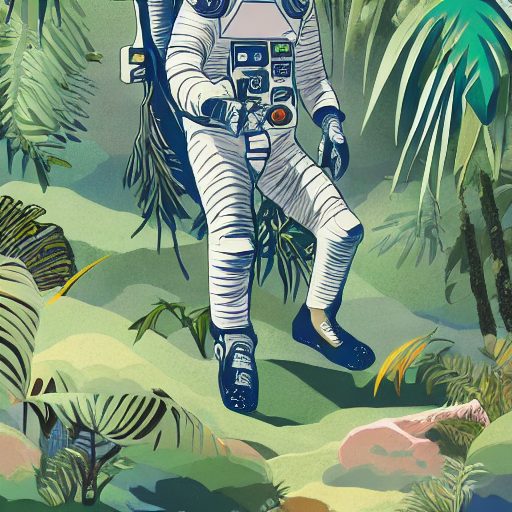

In [1]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
generator = torch.Generator(device="cuda").manual_seed(30)
image = pipeline(
	"Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
	generator=generator,
).images[0]
image

### Control image generation

#### Prompt weighting

'' Prompt weighting is a technique for increasing or decreasing the importance of concepts in a prompt to emphasize or minimize certain features in an image. We recommend using the Compel library to help you generate the weighted prompt embeddings. '' 

In [ ]:
### DON'T RUN THIS CELL

from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")
image = pipeline(
	prompt_embeds=prompt_embeds, # generated from Compel
	negative_prompt_embeds=negative_prompt_embeds, # generated from Compel
).images[0]

#### ControlNet

''...
Each ControlNet model is pretrained on a particular type of conditioning image to generate new images that resemble it. For example, if you take a ControlNet model pretrained on depth maps, you can give the model a depth map as a conditioning input and it’ll generate an image that preserves the spatial information in it. This is quicker and easier than specifying the depth information in a prompt. .... ''